# CS171 - Winter 2020 - Assignment 1
### Instructor: Vagelis Papalexakis
### TA: Yorgos Tsitsikas

In this first assignment you will explore a dataset, visualizing the dataset in various ways, and doing a preliminary analysis on the data. 

For this assignment we are going to use the functionality of Pandas (the library, *not* the unbearably cute animal): https://pandas.pydata.org/ in order to manipulate datasets.
In addition to Pandas, we are going to use Matplotlib (https://matplotlib.org/) and Numpy (http://www.numpy.org/) and you may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it).

Before you start, make sure you have installed all those packages in your local Jupyter instance, as follows:

conda install numpy pandas matplotlib seaborn

## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


In [1]:
#!pip install seaborn
import pandas as pd, matplotlib.pyplot as plt, seaborn as sb, numpy as np
#make sure you import here everything else you may need

## Question 0: Getting real data [0%] 

In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris


In [2]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Question 1: Data Visualization [20%]

### Question 1a: Scatterplots [10%]
1. Plot the scatterplot of all pairs of features and color the points by class label [5%]
2. Which pair of features is (visually) the most correlated?  [2.5%]
3. Can you think of a reason why looking at this plot would be useful in a task where we would have to classify flowers by label? [2.5%]

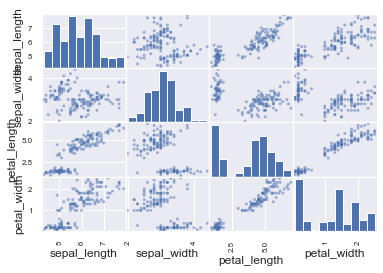

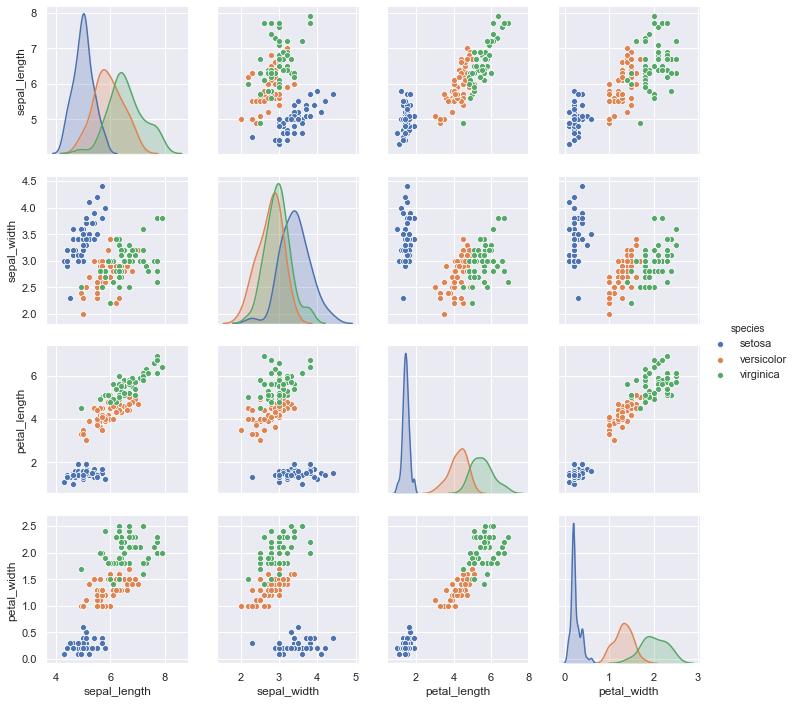

In [4]:
#1- 
#USING PANDAS (can't add colors)
scat_mat = pd.plotting.scatter_matrix(data, alpha=0.5)


#USING SEABORN (pairplot function)
sb.set()
data_sb = sb.load_dataset('iris')
sb.pairplot(data_sb, hue="species")

Your answer here:
2. petal_width and petal_lenght are the features that are visually the most correlated (linearly correlated). 
3. Looking at the plot can help us spot the correlated features (as in question 1)  and give us an idea about what can be the important features to classify flowers by lable. We can see that smaller petal_lenght and smaller petal_width would/could leed to setosa flower. Without seeing an image of the flower we can imagine the setosa being the flower with small petals and a long sepal, virginica big petals smaller sepal. 

### Question 1b: Boxplot and Histogram [10%]

1. Plot the boxplot for each feature of the dataset (you can put all boxplots on a single figure) [4%]
2. Plot the histogram only for petal length [4%]
3. Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]

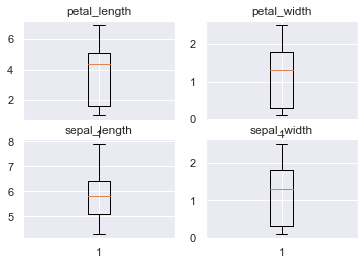

In [5]:
#1- Plot the boxplot for each feature of the dataset
box_p_lenght = data['petal_length']
box_p_width = data['petal_width'] 
box_s_lenght = data['sepal_length']
box_s_width = data['sepal_width'] 

fig, axes = plt.subplots(2,2) #add figure of 4 (2x2) subplots to plot the boxplots

axes[0,0].boxplot(box_p_lenght)
axes[0,0].set_title('petal_length')

axes[0,1].boxplot(box_p_width)
axes[0,1].set_title('petal_width')

axes[1,0].boxplot(box_s_lenght)
axes[1,0].set_title('sepal_length')

axes[1,1].boxplot(box_p_width)
axes[1,1].set_title('sepal_width')
display()

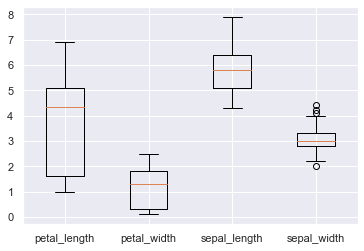

In [6]:
#1- Plot all boxplots on a single figure
data_boxplot = [data['petal_length'], data['petal_width'], data['sepal_length'], data['sepal_width']] 

plt.subplots()
plt.boxplot(data_boxplot)

plt.xticks([1, 2, 3, 4], ['petal_length', 'petal_width', 'sepal_length', 'sepal_width'])
display()

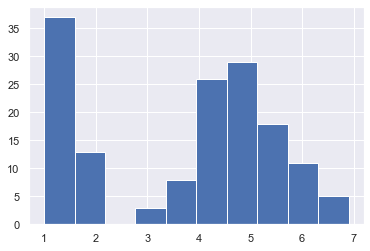

In [7]:
#2- Plot the histogram only for petal length 
plt.hist(data['petal_length'])
display()
#data['petal_length']

Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]
Your answer here:

3. Yes the histogram for petal length is giving more information than the boxplot because it also shows the frequency distribution.

## Question 2: Distance computation [40%]



### Question 2a: Implement the Lp distance function [20%]
1. Write code that implements the Lp distance function between two data points as we saw it in class [15%]
2. Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [5%]

<img src="lp.png">

In [8]:
### 1-Write code that implements the Lp distance function between two data points as we saw it in class [15%]
### ELIF function
'''
def lp(p, X, Y):
    if p==1:
        dist = sum([abs((x - y)) ** p for x, y in zip(X, Y)])**1/p
        print("Manhattan distance 'L1' from x to y: ",dist)
    elif p==2:
        dist = sum([abs((x - y)) ** p for x, y in zip(X, Y)])**1/p
        print("Euclidean distance 'L2' from x to y: ",dist)
    else:
        print("Choose L1 or L2 by key in 1 or 2")
    return
'''           
    

'\ndef lp(p, X, Y):\n    if p==1:\n        dist = sum([abs((x - y)) ** p for x, y in zip(X, Y)])**1/p\n        print("Manhattan distance \'L1\' from x to y: ",dist)\n    elif p==2:\n        dist = sum([abs((x - y)) ** p for x, y in zip(X, Y)])**1/p\n        print("Euclidean distance \'L2\' from x to y: ",dist)\n    else:\n        print("Choose L1 or L2 by key in 1 or 2")\n    return\n'

In [10]:
#1-Write code that implements the Lp distance function between two data points as we saw it in class [15%]
def lp(p, X, Y):
    dist = (sum([abs((x - y)) ** p for x, y in zip(X, Y)]))**(1/p)
    print("L"+str(p)+" Distance from x to y: ",dist)
    return dist

In [11]:
X = list(data.loc[3])[0:4]
Y = list(data.loc[5])[0:4]
lp(2, X, Y)

L2 Distance from x to y:  1.1661903789690604


1.1661903789690604

In [12]:
#Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below.
import math
from numpy import linalg

def compare(X,Y):
    lp_ = lp(2,X,Y)
    lp_np = np.linalg.norm(np.subtract(X,Y))
            #diff = (np.diff([X, Y]) ** 2).sum()    WORKS ONLY WITH 2D points
            #lp_np = math.sqrt(diff)
    print("L2 with Numpy = " + str(lp_np) + "\nDifference of the distance : " + str(lp_ - lp_np))
    return
#Note that the difference of the distances may not be exactly 0 due to numerical precision issues.

In [13]:
compare(X, Y)

L2 Distance from x to y:  1.1661903789690604
L2 with Numpy = 1.1661903789690604
Difference of the distance : 0.0


### Question 2b: Compute the distance matrix between all data points [20%]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [5%]
2. Plot the above matrix and include a colorbar. [5%]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [5%]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [5%]

In [14]:
#1. Compute an N*N distance matrix between all data points (where N is the number of data points) [5%]

#Initialize a 2D matrix with 0
n = len(data)
matrix = np.zeros((n,n))
matrix
#feed the matrix with a double for loop
for i in range(n):
    for j in range(n):
            d1 = list(data.loc[i])[0:4] #remove label at [5] (species) and cast into a list of the 5 elements
            d2 = list(data.loc[j])[0:4] 
            #print(d1,d2)
            d1f = [float(i) for i in d1]
            d2f = [float(i) for i in d2]
            matrix[i][j]=lp(2, d1f, d2f)
            


L2 Distance from x to y:  0.0
L2 Distance from x to y:  0.5385164807134502
L2 Distance from x to y:  0.509901951359278
L2 Distance from x to y:  0.648074069840786
L2 Distance from x to y:  0.1414213562373093
L2 Distance from x to y:  0.6164414002968979
L2 Distance from x to y:  0.5196152422706632
L2 Distance from x to y:  0.17320508075688762
L2 Distance from x to y:  0.9219544457292882
L2 Distance from x to y:  0.4690415759823426
L2 Distance from x to y:  0.37416573867739483
L2 Distance from x to y:  0.3741657386773941
L2 Distance from x to y:  0.5916079783099616
L2 Distance from x to y:  0.9949874371066197
L2 Distance from x to y:  0.8831760866327848
L2 Distance from x to y:  1.1045361017187267
L2 Distance from x to y:  0.5477225575051664
L2 Distance from x to y:  0.09999999999999998
L2 Distance from x to y:  0.7416198487095667
L2 Distance from x to y:  0.33166247903553986
L2 Distance from x to y:  0.4358898943540679
L2 Distance from x to y:  0.30000000000000016
L2 Distance from x to 

L2 Distance from x to y:  3.0708305065568178
L2 Distance from x to y:  3.354101966249685
L2 Distance from x to y:  3.640054944640259
L2 Distance from x to y:  3.0659419433511785
L2 Distance from x to y:  2.4372115213907883
L2 Distance from x to y:  3.1968734726291563
L2 Distance from x to y:  3.1128764832546763
L2 Distance from x to y:  3.1670175244226235
L2 Distance from x to y:  3.398529093593286
L2 Distance from x to y:  2.142428528562855
L2 Distance from x to y:  3.10322412983658
L2 Distance from x to y:  5.313191131514092
L2 Distance from x to y:  4.246174749112429
L2 Distance from x to y:  5.350700888668698
L2 Distance from x to y:  4.730750469005947
L2 Distance from x to y:  5.096076922496363
L2 Distance from x to y:  6.14573022512378
L2 Distance from x to y:  3.6166282640050254
L2 Distance from x to y:  5.68770604022395
L2 Distance from x to y:  5.10098029794274
L2 Distance from x to y:  5.67626637852735
L2 Distance from x to y:  4.397726685459204
L2 Distance from x to y:  4.56

L2 Distance from x to y:  3.8223029707232783
L2 Distance from x to y:  4.7455242070818695
L2 Distance from x to y:  4.962862077471023
L2 Distance from x to y:  4.5902069670114
L2 Distance from x to y:  4.120679555607302
L2 Distance from x to y:  5.200961449578337
L2 Distance from x to y:  5.082322303829225
L2 Distance from x to y:  4.598912915026768
L2 Distance from x to y:  4.2
L2 Distance from x to y:  4.3977266854592045
L2 Distance from x to y:  4.589117562233507
L2 Distance from x to y:  4.060788100849391
L2 Distance from x to y:  0.9219544457292882
L2 Distance from x to y:  0.5099019513592785
L2 Distance from x to y:  0.4358898943540674
L2 Distance from x to y:  0.2999999999999997
L2 Distance from x to y:  0.9219544457292886
L2 Distance from x to y:  1.4594519519326423
L2 Distance from x to y:  0.5477225575051659
L2 Distance from x to y:  0.7874007874011809
L2 Distance from x to y:  0.0
L2 Distance from x to y:  0.5567764362830023
L2 Distance from x to y:  1.2845232578665131
L2 Di

L2 Distance from x to y:  3.6851051545376556
L2 Distance from x to y:  2.8372521918222215
L2 Distance from x to y:  3.7349698793966195
L2 Distance from x to y:  2.9597297173897483
L2 Distance from x to y:  3.9370039370059056
L2 Distance from x to y:  3.5411862419251547
L2 Distance from x to y:  3.269556544854363
L2 Distance from x to y:  3.432200460346103
L2 Distance from x to y:  3.8858718455450894
L2 Distance from x to y:  4.084115571332427
L2 Distance from x to y:  3.4190641994557516
L2 Distance from x to y:  2.437211521390788
L2 Distance from x to y:  2.7928480087537886
L2 Distance from x to y:  2.679552201394853
L2 Distance from x to y:  2.814249455894058
L2 Distance from x to y:  4.034848200366403
L2 Distance from x to y:  3.3436506994600976
L2 Distance from x to y:  3.3778691508109073
L2 Distance from x to y:  3.738983819167984
L2 Distance from x to y:  3.5199431813596087
L2 Distance from x to y:  2.91547594742265
L2 Distance from x to y:  2.98496231131986
L2 Distance from x to 

L2 Distance from x to y:  0.6557438524302
L2 Distance from x to y:  0.648074069840786
L2 Distance from x to y:  0.3000000000000002
L2 Distance from x to y:  0.574456264653803
L2 Distance from x to y:  0.6557438524302003
L2 Distance from x to y:  0.5744562646538031
L2 Distance from x to y:  0.31622776601683805
L2 Distance from x to y:  0.244948974278318
L2 Distance from x to y:  0.7874007874011815
L2 Distance from x to y:  1.1747340124470729
L2 Distance from x to y:  1.392838827718412
L2 Distance from x to y:  0.17320508075688812
L2 Distance from x to y:  0.36055512754639907
L2 Distance from x to y:  0.8717797887081349
L2 Distance from x to y:  0.17320508075688812
L2 Distance from x to y:  0.424264068711928
L2 Distance from x to y:  0.519615242270663
L2 Distance from x to y:  0.5830951894845301
L2 Distance from x to y:  0.7937253933193773
L2 Distance from x to y:  0.4690415759823426
L2 Distance from x to y:  0.761577310586391
L2 Distance from x to y:  1.0344080432788598
L2 Distance from

L2 Distance from x to y:  1.3601470508735445
L2 Distance from x to y:  1.0440306508910548
L2 Distance from x to y:  1.7916472867168913
L2 Distance from x to y:  1.3114877048603997
L2 Distance from x to y:  0.5830951894845297
L2 Distance from x to y:  1.2328828005937953
L2 Distance from x to y:  1.4317821063276353
L2 Distance from x to y:  1.8083141320025122
L2 Distance from x to y:  0.0
L2 Distance from x to y:  0.5477225575051664
L2 Distance from x to y:  0.46904157598234253
L2 Distance from x to y:  0.888819441731559
L2 Distance from x to y:  0.5567764362830022
L2 Distance from x to y:  0.7937253933193774
L2 Distance from x to y:  0.877496438739212
L2 Distance from x to y:  0.842614977317636
L2 Distance from x to y:  1.2806248474865698
L2 Distance from x to y:  1.148912529307606
L2 Distance from x to y:  1.3601470508735443
L2 Distance from x to y:  1.3416407864998738
L2 Distance from x to y:  1.0954451150103321
L2 Distance from x to y:  0.8366600265340753
L2 Distance from x to y:  0.

L2 Distance from x to y:  3.5014282800023193
L2 Distance from x to y:  3.395585369269929
L2 Distance from x to y:  3.7603191353926335
L2 Distance from x to y:  3.740320841853009
L2 Distance from x to y:  3.0886890422961
L2 Distance from x to y:  3.272613634390715
L2 Distance from x to y:  3.511409973215888
L2 Distance from x to y:  3.5679125549822546
L2 Distance from x to y:  3.184336665618132
L2 Distance from x to y:  2.9154759474226504
L2 Distance from x to y:  3.3166247903554003
L2 Distance from x to y:  3.144837038703278
L2 Distance from x to y:  3.217141588429083
L2 Distance from x to y:  3.3391615714128
L2 Distance from x to y:  2.590366769397724
L2 Distance from x to y:  3.1827660925679098
L2 Distance from x to y:  5.121523210920751
L2 Distance from x to y:  4.255584566190643
L2 Distance from x to y:  5.115662224971465
L2 Distance from x to y:  4.623851208678757
L2 Distance from x to y:  4.9325449820554095
L2 Distance from x to y:  5.871115737234278
L2 Distance from x to y:  3.8

L2 Distance from x to y:  3.385262175962152
L2 Distance from x to y:  3.7496666518505353
L2 Distance from x to y:  2.3130067012440754
L2 Distance from x to y:  3.7215588131856787
L2 Distance from x to y:  2.8478061731796283
L2 Distance from x to y:  2.6758176320519302
L2 Distance from x to y:  3.189043743820395
L2 Distance from x to y:  3.1224989991991996
L2 Distance from x to y:  3.6687872655688283
L2 Distance from x to y:  2.539685019840059
L2 Distance from x to y:  3.595830919273041
L2 Distance from x to y:  3.398529093593286
L2 Distance from x to y:  2.9849623113198596
L2 Distance from x to y:  3.73496987939662
L2 Distance from x to y:  2.8530685235374214
L2 Distance from x to y:  3.8131351929875237
L2 Distance from x to y:  3.0413812651491097
L2 Distance from x to y:  4.0162171256046415
L2 Distance from x to y:  3.6318039594669758
L2 Distance from x to y:  3.385262175962152
L2 Distance from x to y:  3.5651086939951777
L2 Distance from x to y:  4.018706259482023
L2 Distance from x 

L2 Distance from x to y:  4.832183771339827
L2 Distance from x to y:  3.6207733980463344
L2 Distance from x to y:  3.645545226711637
L2 Distance from x to y:  4.465422712353221
L2 Distance from x to y:  4.624932431938871
L2 Distance from x to y:  5.080354318352215
L2 Distance from x to y:  5.460769176590419
L2 Distance from x to y:  4.506661735697499
L2 Distance from x to y:  3.7894590642992827
L2 Distance from x to y:  4.244997055358224
L2 Distance from x to y:  5.2915026221291805
L2 Distance from x to y:  4.4877611344633745
L2 Distance from x to y:  4.20356991139674
L2 Distance from x to y:  3.5482389998420336
L2 Distance from x to y:  4.342810150121693
L2 Distance from x to y:  4.594562003064056
L2 Distance from x to y:  4.182104733265296
L2 Distance from x to y:  3.9166312055132275
L2 Distance from x to y:  4.817675788178362
L2 Distance from x to y:  4.7
L2 Distance from x to y:  4.2296571965113205
L2 Distance from x to y:  3.937003937005905
L2 Distance from x to y:  4.052159917870

L2 Distance from x to y:  4.279018579066933
L2 Distance from x to y:  3.885871845545089
L2 Distance from x to y:  4.904079934095691
L2 Distance from x to y:  4.794788837894741
L2 Distance from x to y:  4.302324952859791
L2 Distance from x to y:  3.9242833740697165
L2 Distance from x to y:  4.106093033529562
L2 Distance from x to y:  4.328972164382673
L2 Distance from x to y:  3.8118237105091834
L2 Distance from x to y:  0.30000000000000016
L2 Distance from x to y:  0.7615773105863909
L2 Distance from x to y:  0.6999999999999996
L2 Distance from x to y:  0.806225774829855
L2 Distance from x to y:  0.264575131106459
L2 Distance from x to y:  0.41231056256176646
L2 Distance from x to y:  0.6000000000000002
L2 Distance from x to y:  0.3741657386773943
L2 Distance from x to y:  1.0862780491200212
L2 Distance from x to y:  0.6999999999999998
L2 Distance from x to y:  0.36055512754639957
L2 Distance from x to y:  0.479583152331272
L2 Distance from x to y:  0.8246211251235323
L2 Distance from 

L2 Distance from x to y:  3.3015148038438356
L2 Distance from x to y:  3.190611226708764
L2 Distance from x to y:  3.4146742157927745
L2 Distance from x to y:  4.641120554348917
L2 Distance from x to y:  3.865229618017538
L2 Distance from x to y:  4.026164427839479
L2 Distance from x to y:  4.476605857119878
L2 Distance from x to y:  4.165333119931707
L2 Distance from x to y:  3.4899856733230292
L2 Distance from x to y:  3.4971416900091428
L2 Distance from x to y:  3.7907782842049733
L2 Distance from x to y:  4.124318125460256
L2 Distance from x to y:  3.52703841770968
L2 Distance from x to y:  2.7892651361962706
L2 Distance from x to y:  3.6414282912066254
L2 Distance from x to y:  3.5791060336346563
L2 Distance from x to y:  3.6262928728937496
L2 Distance from x to y:  3.892300091205713
L2 Distance from x to y:  2.503996805109783
L2 Distance from x to y:  3.559494346111537
L2 Distance from x to y:  5.768015256567895
L2 Distance from x to y:  4.685082710048992
L2 Distance from x to y:

L2 Distance from x to y:  3.6373066958946425
L2 Distance from x to y:  3.3045423283716615
L2 Distance from x to y:  2.61725046566048
L2 Distance from x to y:  2.630589287593181
L2 Distance from x to y:  2.8948229652260262
L2 Distance from x to y:  3.252691193458118
L2 Distance from x to y:  2.6551836094703507
L2 Distance from x to y:  1.9621416870348585
L2 Distance from x to y:  2.7622454633866265
L2 Distance from x to y:  2.6944387170614963
L2 Distance from x to y:  2.749545416973504
L2 Distance from x to y:  3.0298514815086235
L2 Distance from x to y:  1.7088007490635062
L2 Distance from x to y:  2.6870057685088806
L2 Distance from x to y:  4.935585071701226
L2 Distance from x to y:  3.823610858861032
L2 Distance from x to y:  5.005996404313531
L2 Distance from x to y:  4.330127018922194
L2 Distance from x to y:  4.718050444834179
L2 Distance from x to y:  5.805170109479997
L2 Distance from x to y:  3.135283081318177
L2 Distance from x to y:  5.331041174104736
L2 Distance from x to y

L2 Distance from x to y:  3.1527765540868895
L2 Distance from x to y:  3.293933818400121
L2 Distance from x to y:  3.7148351242013424
L2 Distance from x to y:  3.398529093593286
L2 Distance from x to y:  2.7531799795872405
L2 Distance from x to y:  2.7622454633866265
L2 Distance from x to y:  3.0610455730027937
L2 Distance from x to y:  3.3719430600174727
L2 Distance from x to y:  2.7712812921102032
L2 Distance from x to y:  2.1118712081942874
L2 Distance from x to y:  2.9017236257093817
L2 Distance from x to y:  2.8372521918222215
L2 Distance from x to y:  2.882707061079915
L2 Distance from x to y:  3.128897569432403
L2 Distance from x to y:  1.8083141320025122
L2 Distance from x to y:  2.8124722220850464
L2 Distance from x to y:  5.046781152378217
L2 Distance from x to y:  3.9534794801541584
L2 Distance from x to y:  5.094114250780012
L2 Distance from x to y:  4.460941604639093
L2 Distance from x to y:  4.825971404805461
L2 Distance from x to y:  5.9
L2 Distance from x to y:  3.30454

L2 Distance from x to y:  4.581484475582124
L2 Distance from x to y:  4.1303752856126765
L2 Distance from x to y:  4.370354676682432
L2 Distance from x to y:  4.571651780264984
L2 Distance from x to y:  4.00374824383352
L2 Distance from x to y:  0.3872983346207423
L2 Distance from x to y:  0.6782329983125268
L2 Distance from x to y:  0.7810249675906655
L2 Distance from x to y:  0.8774964387392128
L2 Distance from x to y:  0.5000000000000003
L2 Distance from x to y:  0.5385164807134504
L2 Distance from x to y:  0.8124038404635967
L2 Distance from x to y:  0.44721359549995826
L2 Distance from x to y:  1.140175425099138
L2 Distance from x to y:  0.6557438524302001
L2 Distance from x to y:  0.3605551275463992
L2 Distance from x to y:  0.6403124237432855
L2 Distance from x to y:  0.7874007874011815
L2 Distance from x to y:  1.272792206135786
L2 Distance from x to y:  0.8062257748298548
L2 Distance from x to y:  1.0440306508910553
L2 Distance from x to y:  0.5385164807134504
L2 Distance from

L2 Distance from x to y:  0.5567764362830022
L2 Distance from x to y:  0.6557438524302
L2 Distance from x to y:  0.8831760866327844
L2 Distance from x to y:  0.2645751311064593
L2 Distance from x to y:  0.7416198487095659
L2 Distance from x to y:  0.3464101615137761
L2 Distance from x to y:  0.7280109889280516
L2 Distance from x to y:  0.26457513110645875
L2 Distance from x to y:  4.043513323831146
L2 Distance from x to y:  3.6359317925395684
L2 Distance from x to y:  4.1856899072912706
L2 Distance from x to y:  2.947880594596735
L2 Distance from x to y:  3.7709415269929596
L2 Distance from x to y:  3.3421549934136805
L2 Distance from x to y:  3.8065732621348563
L2 Distance from x to y:  2.1307275752662513
L2 Distance from x to y:  3.738983819167983
L2 Distance from x to y:  2.7748873851023212
L2 Distance from x to y:  2.4556058315617353
L2 Distance from x to y:  3.2031234756093934
L2 Distance from x to y:  3.0133038346638727
L2 Distance from x to y:  3.661966684720111
L2 Distance from

L2 Distance from x to y:  5.818075283115542
L2 Distance from x to y:  4.914264950122245
L2 Distance from x to y:  4.59782557302906
L2 Distance from x to y:  3.8729833462074166
L2 Distance from x to y:  4.817675788178362
L2 Distance from x to y:  5.033885179461287
L2 Distance from x to y:  4.6690470119715
L2 Distance from x to y:  4.143669871020132
L2 Distance from x to y:  5.274466797696237
L2 Distance from x to y:  5.165268628057984
L2 Distance from x to y:  4.666904755831214
L2 Distance from x to y:  4.220189569201838
L2 Distance from x to y:  4.457577817604534
L2 Distance from x to y:  4.672258554489467
L2 Distance from x to y:  4.106093033529562
L2 Distance from x to y:  0.866025403784438
L2 Distance from x to y:  0.5099019513592784
L2 Distance from x to y:  0.3605551275463989
L2 Distance from x to y:  0.29999999999999954
L2 Distance from x to y:  0.854400374531753
L2 Distance from x to y:  1.4177446878757824
L2 Distance from x to y:  0.46904157598234253
L2 Distance from x to y:  0

L2 Distance from x to y:  1.0392304845413267
L2 Distance from x to y:  1.5652475842498528
L2 Distance from x to y:  0.9380831519646863
L2 Distance from x to y:  0.7141428428542852
L2 Distance from x to y:  1.2727922061357855
L2 Distance from x to y:  1.3
L2 Distance from x to y:  0.0
L2 Distance from x to y:  0.9110433579144301
L2 Distance from x to y:  1.3674794331177345
L2 Distance from x to y:  1.7262676501632066
L2 Distance from x to y:  0.768114574786861
L2 Distance from x to y:  1.6462077633154326
L2 Distance from x to y:  0.9165151389911683
L2 Distance from x to y:  1.6278820596099708
L2 Distance from x to y:  1.1269427669584644
L2 Distance from x to y:  4.453088815642464
L2 Distance from x to y:  4.012480529547776
L2 Distance from x to y:  4.560701700396553
L2 Distance from x to y:  3.047950130825634
L2 Distance from x to y:  4.071854614300467
L2 Distance from x to y:  3.595830919273041
L2 Distance from x to y:  4.182104733265297
L2 Distance from x to y:  2.15870331449229
L2 Di

L2 Distance from x to y:  3.1654383582688834
L2 Distance from x to y:  3.7336309405188945
L2 Distance from x to y:  2.762245463386627
L2 Distance from x to y:  3.3852621759621515
L2 Distance from x to y:  2.9883105594967874
L2 Distance from x to y:  3.3120990323358392
L2 Distance from x to y:  2.0784609690826525
L2 Distance from x to y:  3.340658617698013
L2 Distance from x to y:  2.493992782667985
L2 Distance from x to y:  2.483948469674844
L2 Distance from x to y:  2.789265136196271
L2 Distance from x to y:  2.853068523537421
L2 Distance from x to y:  3.263433774416144
L2 Distance from x to y:  2.181742422927143
L2 Distance from x to y:  3.209361307176243
L2 Distance from x to y:  2.9765752132274437
L2 Distance from x to y:  2.626785107312739
L2 Distance from x to y:  3.426368339802363
L2 Distance from x to y:  2.535744466621193
L2 Distance from x to y:  3.371943060017473
L2 Distance from x to y:  2.6870057685088806
L2 Distance from x to y:  3.6523964735499352
L2 Distance from x to y

L2 Distance from x to y:  4.657252408878007
L2 Distance from x to y:  6.0124870062229645
L2 Distance from x to y:  5.0408332644514235
L2 Distance from x to y:  4.756048780237647
L2 Distance from x to y:  4.014971979976947
L2 Distance from x to y:  4.990991885387112
L2 Distance from x to y:  5.186520991955976
L2 Distance from x to y:  4.8373546489791295
L2 Distance from x to y:  4.274342054632502
L2 Distance from x to y:  5.431390245600108
L2 Distance from x to y:  5.310367218940702
L2 Distance from x to y:  4.8270073544588685
L2 Distance from x to y:  4.38520238985614
L2 Distance from x to y:  4.618441295502197
L2 Distance from x to y:  4.796873982084582
L2 Distance from x to y:  4.240283009422838
L2 Distance from x to y:  0.30000000000000027
L2 Distance from x to y:  0.812403840463596
L2 Distance from x to y:  0.8062257748298548
L2 Distance from x to y:  0.9219544457292889
L2 Distance from x to y:  0.3316624790355399
L2 Distance from x to y:  0.36055512754639896
L2 Distance from x to 

L2 Distance from x to y:  3.916631205513228
L2 Distance from x to y:  4.043513323831146
L2 Distance from x to y:  4.449719092257398
L2 Distance from x to y:  3.915354390090379
L2 Distance from x to y:  4.106093033529563
L2 Distance from x to y:  4.453088815642464
L2 Distance from x to y:  4.445222154178574
L2 Distance from x to y:  3.786819245752298
L2 Distance from x to y:  3.5791060336346563
L2 Distance from x to y:  4.120679555607303
L2 Distance from x to y:  3.8755644750152203
L2 Distance from x to y:  4.253234063627349
L2 Distance from x to y:  3.849675310984032
L2 Distance from x to y:  4.042276586281548
L2 Distance from x to y:  0.0
L2 Distance from x to y:  0.6403124237432847
L2 Distance from x to y:  0.26457513110645914
L2 Distance from x to y:  1.886796226411321
L2 Distance from x to y:  0.6557438524302004
L2 Distance from x to y:  1.378404875209022
L2 Distance from x to y:  0.7348469228349536
L2 Distance from x to y:  2.677685567799177
L2 Distance from x to y:  0.51961524227

L2 Distance from x to y:  1.486606874731851
L2 Distance from x to y:  1.6155494421403511
L2 Distance from x to y:  1.2529964086141672
L2 Distance from x to y:  1.1874342087037917
L2 Distance from x to y:  0.9899494936611664
L2 Distance from x to y:  1.212435565298214
L2 Distance from x to y:  1.9364916731037076
L2 Distance from x to y:  2.1354156504062622
L2 Distance from x to y:  1.4999999999999993
L2 Distance from x to y:  1.1401754250991376
L2 Distance from x to y:  1.6673332000533063
L2 Distance from x to y:  0.6782329983125268
L2 Distance from x to y:  0.8544003745317528
L2 Distance from x to y:  0.8602325267042625
L2 Distance from x to y:  1.4352700094407325
L2 Distance from x to y:  1.4662878298615183
L2 Distance from x to y:  1.0295630140986995
L2 Distance from x to y:  0.787400787401181
L2 Distance from x to y:  2.20454076850486
L2 Distance from x to y:  2.351595203260969
L2 Distance from x to y:  1.2767145334803707
L2 Distance from x to y:  1.1357816691600544
L2 Distance from

L2 Distance from x to y:  3.48998567332303
L2 Distance from x to y:  3.3256578296631782
L2 Distance from x to y:  3.538361202590827
L2 Distance from x to y:  3.3421549934136805
L2 Distance from x to y:  3.3331666624997918
L2 Distance from x to y:  3.284813541131369
L2 Distance from x to y:  3.4496376621320683
L2 Distance from x to y:  3.872983346207417
L2 Distance from x to y:  3.681032463861192
L2 Distance from x to y:  3.5171010790137953
L2 Distance from x to y:  3.514256678161116
L2 Distance from x to y:  3.385262175962152
L2 Distance from x to y:  3.1368774282716245
L2 Distance from x to y:  3.3704599092705436
L2 Distance from x to y:  3.082207001484488
L2 Distance from x to y:  3.3136083051561784
L2 Distance from x to y:  3.9127995093027708
L2 Distance from x to y:  3.014962686336267
L2 Distance from x to y:  3.023243291566195
L2 Distance from x to y:  3.1859064644147987
L2 Distance from x to y:  3.1733263305244863
L2 Distance from x to y:  3.3090784215548594
L2 Distance from x to

L2 Distance from x to y:  0.9273618495495699
L2 Distance from x to y:  1.4798648586948742
L2 Distance from x to y:  1.4035668847618201
L2 Distance from x to y:  0.9949874371066199
L2 Distance from x to y:  0.9055385138137413
L2 Distance from x to y:  0.7348469228349533
L2 Distance from x to y:  0.9999999999999999
L2 Distance from x to y:  0.6708203932499363
L2 Distance from x to y:  2.345207879911715
L2 Distance from x to y:  2.1470910553583886
L2 Distance from x to y:  2.3065125189341593
L2 Distance from x to y:  2.111871208194288
L2 Distance from x to y:  2.387467277262665
L2 Distance from x to y:  2.328089345364563
L2 Distance from x to y:  2.2781571499789037
L2 Distance from x to y:  2.211334438749598
L2 Distance from x to y:  2.179449471770337
L2 Distance from x to y:  2.1307275752662513
L2 Distance from x to y:  2.4124676163629637
L2 Distance from x to y:  2.1307275752662513
L2 Distance from x to y:  2.188606862823929
L2 Distance from x to y:  2.5238858928247923
L2 Distance from 

L2 Distance from x to y:  1.2727922061357855
L2 Distance from x to y:  0.5385164807134499
L2 Distance from x to y:  1.307669683062202
L2 Distance from x to y:  0.9165151389911674
L2 Distance from x to y:  1.503329637837291
L2 Distance from x to y:  1.224744871391589
L2 Distance from x to y:  1.284523257866513
L2 Distance from x to y:  1.5165750888103098
L2 Distance from x to y:  1.838477631085023
L2 Distance from x to y:  1.9078784028338913
L2 Distance from x to y:  1.0246950765959597
L2 Distance from x to y:  0.7615773105863908
L2 Distance from x to y:  0.529150262212918
L2 Distance from x to y:  0.6164414002968975
L2 Distance from x to y:  0.6324555320336755
L2 Distance from x to y:  1.4560219778561034
L2 Distance from x to y:  0.7071067811865476
L2 Distance from x to y:  1.2369316876852978
L2 Distance from x to y:  1.7492855684535904
L2 Distance from x to y:  1.2767145334803705
L2 Distance from x to y:  0.5477225575051655
L2 Distance from x to y:  0.38729833462074165
L2 Distance fro

L2 Distance from x to y:  1.8466185312619383
L2 Distance from x to y:  3.001666203960726
L2 Distance from x to y:  1.174734012447073
L2 Distance from x to y:  2.5436194683953803
L2 Distance from x to y:  1.8814887722226774
L2 Distance from x to y:  2.580697580112788
L2 Distance from x to y:  1.2083045973594566
L2 Distance from x to y:  1.3076696830622017
L2 Distance from x to y:  1.691153452528776
L2 Distance from x to y:  1.0862780491200215
L2 Distance from x to y:  1.2922847983320083
L2 Distance from x to y:  1.4628738838327788
L2 Distance from x to y:  1.4628738838327788
L2 Distance from x to y:  3.2588341473600644
L2 Distance from x to y:  3.366006535941367
L2 Distance from x to y:  1.1357816691600544
L2 Distance from x to y:  1.982422760159901
L2 Distance from x to y:  0.9327379053088819
L2 Distance from x to y:  3.127299154222378
L2 Distance from x to y:  0.9110433579144298
L2 Distance from x to y:  1.8275666882497066
L2 Distance from x to y:  2.2494443758403984
L2 Distance from 

L2 Distance from x to y:  2.6476404589747453
L2 Distance from x to y:  2.803569153775237
L2 Distance from x to y:  2.8337254630609503
L2 Distance from x to y:  2.2825424421026654
L2 Distance from x to y:  2.181742422927143
L2 Distance from x to y:  2.5475478405713994
L2 Distance from x to y:  2.5039968051097827
L2 Distance from x to y:  2.6720778431774774
L2 Distance from x to y:  2.5199206336708304
L2 Distance from x to y:  2.563201123595259
L2 Distance from x to y:  1.808314132002513
L2 Distance from x to y:  1.256980508997654
L2 Distance from x to y:  1.860107523773828
L2 Distance from x to y:  0.7280109889280518
L2 Distance from x to y:  1.3638181696985856
L2 Distance from x to y:  0.9110433579144299
L2 Distance from x to y:  1.3964240043768943
L2 Distance from x to y:  0.9591663046625435
L2 Distance from x to y:  1.4142135623730947
L2 Distance from x to y:  0.5477225575051655
L2 Distance from x to y:  1.1269427669584644
L2 Distance from x to y:  0.7071067811865478
L2 Distance from

L2 Distance from x to y:  3.152776554086889
L2 Distance from x to y:  2.9999999999999996
L2 Distance from x to y:  3.0626785662227105
L2 Distance from x to y:  2.77848879788996
L2 Distance from x to y:  3.1160872901765764
L2 Distance from x to y:  2.920616373302046
L2 Distance from x to y:  3.1511902513177454
L2 Distance from x to y:  2.922327839240491
L2 Distance from x to y:  2.9257477676655586
L2 Distance from x to y:  2.8948229652260253
L2 Distance from x to y:  3.0315012782448236
L2 Distance from x to y:  3.485685011586675
L2 Distance from x to y:  3.277193921634787
L2 Distance from x to y:  3.1654383582688825
L2 Distance from x to y:  3.130495168499705
L2 Distance from x to y:  2.9849623113198596
L2 Distance from x to y:  2.7331300737432893
L2 Distance from x to y:  2.991655060330318
L2 Distance from x to y:  2.6551836094703503
L2 Distance from x to y:  2.9342801502242417
L2 Distance from x to y:  3.5355339059327373
L2 Distance from x to y:  2.6191601707417584
L2 Distance from x 

L2 Distance from x to y:  0.24494897427831766
L2 Distance from x to y:  0.5291502622129185
L2 Distance from x to y:  1.039230484541326
L2 Distance from x to y:  0.2645751311064592
L2 Distance from x to y:  0.8774964387392121
L2 Distance from x to y:  0.4123105625617663
L2 Distance from x to y:  0.6000000000000002
L2 Distance from x to y:  0.5477225575051663
L2 Distance from x to y:  0.8485281374238572
L2 Distance from x to y:  1.0295630140987
L2 Distance from x to y:  0.4242640687119284
L2 Distance from x to y:  2.7386127875258306
L2 Distance from x to y:  1.4696938456699067
L2 Distance from x to y:  2.738612787525831
L2 Distance from x to y:  2.007485989988473
L2 Distance from x to y:  2.4248711305964283
L2 Distance from x to y:  3.5411862419251547
L2 Distance from x to y:  1.0999999999999994
L2 Distance from x to y:  3.0495901363953815
L2 Distance from x to y:  2.304343724360583
L2 Distance from x to y:  3.2511536414017717
L2 Distance from x to y:  1.8841443681416772
L2 Distance from

L2 Distance from x to y:  2.3000000000000003
L2 Distance from x to y:  1.691153452528776
L2 Distance from x to y:  2.0615528128088303
L2 Distance from x to y:  3.112876483254676
L2 Distance from x to y:  1.3928388277184114
L2 Distance from x to y:  2.643860813280457
L2 Distance from x to y:  1.9849433241279208
L2 Distance from x to y:  2.7748873851023212
L2 Distance from x to y:  1.4212670403551895
L2 Distance from x to y:  1.4662878298615178
L2 Distance from x to y:  1.849324200890693
L2 Distance from x to y:  1.3190905958272918
L2 Distance from x to y:  1.5842979517754856
L2 Distance from x to y:  1.7146428199482244
L2 Distance from x to y:  1.6431676725154984
L2 Distance from x to y:  3.414674215792775
L2 Distance from x to y:  3.465544690232692
L2 Distance from x to y:  1.1874342087037917
L2 Distance from x to y:  2.165640782770772
L2 Distance from x to y:  1.2449899597988734
L2 Distance from x to y:  3.215587038162706
L2 Distance from x to y:  1.0535653752852743
L2 Distance from x

L2 Distance from x to y:  1.407124727947029
L2 Distance from x to y:  0.9899494936611662
L2 Distance from x to y:  1.2999999999999998
L2 Distance from x to y:  1.3490737563232043
L2 Distance from x to y:  1.0954451150103324
L2 Distance from x to y:  2.925747767665559
L2 Distance from x to y:  2.941088233970549
L2 Distance from x to y:  0.741619848709566
L2 Distance from x to y:  1.7349351572897476
L2 Distance from x to y:  0.9643650760992956
L2 Distance from x to y:  2.683281572999748
L2 Distance from x to y:  0.670820393249937
L2 Distance from x to y:  1.5556349186104048
L2 Distance from x to y:  1.8493242008906932
L2 Distance from x to y:  0.6164414002968978
L2 Distance from x to y:  0.6633249580710802
L2 Distance from x to y:  1.3076696830622019
L2 Distance from x to y:  1.6186414056238647
L2 Distance from x to y:  2.0346989949375804
L2 Distance from x to y:  2.7874719729532713
L2 Distance from x to y:  1.378404875209022
L2 Distance from x to y:  0.5385164807134502
L2 Distance from 

L2 Distance from x to y:  3.8858718455450894
L2 Distance from x to y:  4.004996878900157
L2 Distance from x to y:  4.158124577258358
L2 Distance from x to y:  4.6551047249229525
L2 Distance from x to y:  4.1036569057366385
L2 Distance from x to y:  3.9572717874818757
L2 Distance from x to y:  4.052159917870962
L2 Distance from x to y:  4.018706259482023
L2 Distance from x to y:  3.609709129556008
L2 Distance from x to y:  3.9987498046264407
L2 Distance from x to y:  3.656501059756444
L2 Distance from x to y:  3.9484174044799265
L2 Distance from x to y:  4.621688003316537
L2 Distance from x to y:  3.682390527904394
L2 Distance from x to y:  3.7696153649941526
L2 Distance from x to y:  3.8678159211627428
L2 Distance from x to y:  3.8522720568516444
L2 Distance from x to y:  3.9217343102255153
L2 Distance from x to y:  3.989987468652
L2 Distance from x to y:  4.031128874149275
L2 Distance from x to y:  3.971145930332956
L2 Distance from x to y:  3.7696153649941526
L2 Distance from x to y:

L2 Distance from x to y:  0.6782329983125266
L2 Distance from x to y:  1.2247448713915896
L2 Distance from x to y:  1.4832396974191329
L2 Distance from x to y:  1.0862780491200215
L2 Distance from x to y:  1.7406895185529214
L2 Distance from x to y:  0.854400374531753
L2 Distance from x to y:  1.2489995996796799
L2 Distance from x to y:  0.6782329983125269
L2 Distance from x to y:  0.8602325267042631
L2 Distance from x to y:  0.8660254037844387
L2 Distance from x to y:  0.6782329983125266
L2 Distance from x to y:  0.4242640687119286
L2 Distance from x to y:  0.0
L2 Distance from x to y:  0.888819441731559
L2 Distance from x to y:  1.9748417658131499
L2 Distance from x to y:  1.8973665961010278
L2 Distance from x to y:  1.9949937343260002
L2 Distance from x to y:  1.536229149573722
L2 Distance from x to y:  0.7745966692414834
L2 Distance from x to y:  1.4071247279470287
L2 Distance from x to y:  0.9539392014169458
L2 Distance from x to y:  0.374165738677394
L2 Distance from x to y:  1.0

L2 Distance from x to y:  1.5620499351813308
L2 Distance from x to y:  2.709243436828813
L2 Distance from x to y:  1.1874342087037915
L2 Distance from x to y:  2.240535650240808
L2 Distance from x to y:  1.5588457268119895
L2 Distance from x to y:  2.3430749027719964
L2 Distance from x to y:  0.9746794344808962
L2 Distance from x to y:  0.9999999999999999
L2 Distance from x to y:  1.4177446878757824
L2 Distance from x to y:  0.8660254037844385
L2 Distance from x to y:  1.1045361017187258
L2 Distance from x to y:  1.236931687685298
L2 Distance from x to y:  1.161895003862225
L2 Distance from x to y:  3.004995840263344
L2 Distance from x to y:  3.0626785662227114
L2 Distance from x to y:  0.8602325267042624
L2 Distance from x to y:  1.726267650163207
L2 Distance from x to y:  0.7615773105863912
L2 Distance from x to y:  2.8266588050205144
L2 Distance from x to y:  0.6164414002968976
L2 Distance from x to y:  1.5652475842498532
L2 Distance from x to y:  1.9672315572906003
L2 Distance from

L2 Distance from x to y:  1.5588457268119897
L2 Distance from x to y:  2.6191601707417593
L2 Distance from x to y:  2.9765752132274437
L2 Distance from x to y:  1.4628738838327795
L2 Distance from x to y:  1.5556349186104048
L2 Distance from x to y:  2.2825424421026654
L2 Distance from x to y:  2.7386127875258306
L2 Distance from x to y:  3.1144823004794873
L2 Distance from x to y:  3.910242959203431
L2 Distance from x to y:  2.328089345364563
L2 Distance from x to y:  1.6278820596099706
L2 Distance from x to y:  1.9313207915827961
L2 Distance from x to y:  3.4539832078341086
L2 Distance from x to y:  2.563201123595259
L2 Distance from x to y:  2.1633307652783937
L2 Distance from x to y:  1.449137674618944
L2 Distance from x to y:  2.4515301344262532
L2 Distance from x to y:  2.619160170741759
L2 Distance from x to y:  2.3622023622035435
L2 Distance from x to y:  1.5842979517754858
L2 Distance from x to y:  2.8600699292150185
L2 Distance from x to y:  2.7964262908219126
L2 Distance fro

L2 Distance from x to y:  4.220189569201838
L2 Distance from x to y:  4.260281680828158
L2 Distance from x to y:  4.071854614300467
L2 Distance from x to y:  4.291852746774986
L2 Distance from x to y:  4.158124577258358
L2 Distance from x to y:  4.071854614300467
L2 Distance from x to y:  4.364630568559039
L2 Distance from x to y:  4.0274061131204535
L2 Distance from x to y:  4.215447781671599
L2 Distance from x to y:  4.305810028322197
L2 Distance from x to y:  4.382921400162226
L2 Distance from x to y:  3.858756276314947
L2 Distance from x to y:  3.7013511046643495
L2 Distance from x to y:  4.112177038990418
L2 Distance from x to y:  4.028647415696737
L2 Distance from x to y:  4.226109321823087
L2 Distance from x to y:  4.050925820105818
L2 Distance from x to y:  4.124318125460256
L2 Distance from x to y:  1.2041594578792294
L2 Distance from x to y:  0.8831760866327846
L2 Distance from x to y:  1.0099504938362078
L2 Distance from x to y:  1.3076696830622019
L2 Distance from x to y:  

L2 Distance from x to y:  1.28062484748657
L2 Distance from x to y:  2.395829710142188
L2 Distance from x to y:  1.288409872672513
L2 Distance from x to y:  1.161895003862225
L2 Distance from x to y:  1.1532562594670797
L2 Distance from x to y:  0.7000000000000003
L2 Distance from x to y:  2.443358344574124
L2 Distance from x to y:  1.2206555615733705
L2 Distance from x to y:  1.7
L2 Distance from x to y:  1.1357816691600546
L2 Distance from x to y:  1.40356688476182
L2 Distance from x to y:  1.0488088481701512
L2 Distance from x to y:  1.3228756555322951
L2 Distance from x to y:  2.1886068628239284
L2 Distance from x to y:  1.9183326093250876
L2 Distance from x to y:  1.7464249196572974
L2 Distance from x to y:  1.2884098726725124
L2 Distance from x to y:  1.860107523773827
L2 Distance from x to y:  0.6782329983125266
L2 Distance from x to y:  0.8774964387392118
L2 Distance from x to y:  1.0099504938362076
L2 Distance from x to y:  1.3038404810405297
L2 Distance from x to y:  1.367479

L2 Distance from x to y:  0.3000000000000001
L2 Distance from x to y:  0.4358898943540673
L2 Distance from x to y:  0.3872983346207417
L2 Distance from x to y:  1.260952021291849
L2 Distance from x to y:  0.7416198487095663
L2 Distance from x to y:  1.1832159566199232
L2 Distance from x to y:  1.5264337522473752
L2 Distance from x to y:  0.916515138991168
L2 Distance from x to y:  0.5196152422706631
L2 Distance from x to y:  0.0
L2 Distance from x to y:  0.42426406871192884
L2 Distance from x to y:  0.9899494936611661
L2 Distance from x to y:  0.3316624790355399
L2 Distance from x to y:  0.9327379053088817
L2 Distance from x to y:  0.30000000000000016
L2 Distance from x to y:  0.5830951894845302
L2 Distance from x to y:  0.48989794855663565
L2 Distance from x to y:  0.8602325267042626
L2 Distance from x to y:  1.0954451150103324
L2 Distance from x to y:  0.374165738677394
L2 Distance from x to y:  2.592296279363144
L2 Distance from x to y:  1.3038404810405293
L2 Distance from x to y:  

L2 Distance from x to y:  2.7386127875258306
L2 Distance from x to y:  3.5000000000000004
L2 Distance from x to y:  1.9899748742132397
L2 Distance from x to y:  1.2609520212918488
L2 Distance from x to y:  1.640121946685672
L2 Distance from x to y:  3.064310689208912
L2 Distance from x to y:  2.211334438749598
L2 Distance from x to y:  1.7944358444926363
L2 Distance from x to y:  1.0954451150103321
L2 Distance from x to y:  2.056696380120314
L2 Distance from x to y:  2.2494443758403984
L2 Distance from x to y:  1.969771560359221
L2 Distance from x to y:  1.3076696830622019
L2 Distance from x to y:  2.485960578931211
L2 Distance from x to y:  2.4248711305964283
L2 Distance from x to y:  1.902629759044045
L2 Distance from x to y:  1.3228756555322954
L2 Distance from x to y:  1.652271164185831
L2 Distance from x to y:  1.9924858845171276
L2 Distance from x to y:  1.3190905958272918
L2 Distance from x to y:  2.387467277262665
L2 Distance from x to y:  2.179449471770337
L2 Distance from x t

L2 Distance from x to y:  3.0099833886584824
L2 Distance from x to y:  2.9698484809835
L2 Distance from x to y:  2.90516780926679
L2 Distance from x to y:  3.2280024783137944
L2 Distance from x to y:  3.2832910318764013
L2 Distance from x to y:  3.0675723300355937
L2 Distance from x to y:  3.2848135411313684
L2 Distance from x to y:  3.1654383582688834
L2 Distance from x to y:  3.0675723300355937
L2 Distance from x to y:  3.3645207682521447
L2 Distance from x to y:  3.018277654557314
L2 Distance from x to y:  3.203123475609394
L2 Distance from x to y:  3.348133808556642
L2 Distance from x to y:  3.3763886032268267
L2 Distance from x to y:  2.8460498941515415
L2 Distance from x to y:  2.696293752542553
L2 Distance from x to y:  3.108054053584011
L2 Distance from x to y:  3.023243291566195
L2 Distance from x to y:  3.217141588429083
L2 Distance from x to y:  3.0495901363953815
L2 Distance from x to y:  3.1144823004794877
L2 Distance from x to y:  1.4282856857085697
L2 Distance from x to 

L2 Distance from x to y:  0.6999999999999996
L2 Distance from x to y:  0.5744562646538027
L2 Distance from x to y:  0.6708203932499366
L2 Distance from x to y:  0.26457513110645864
L2 Distance from x to y:  1.0908712114635715
L2 Distance from x to y:  0.5744562646538031
L2 Distance from x to y:  0.8366600265340758
L2 Distance from x to y:  1.2206555615733705
L2 Distance from x to y:  0.8366600265340756
L2 Distance from x to y:  0.22360679774997935
L2 Distance from x to y:  0.374165738677394
L2 Distance from x to y:  0.42426406871192895
L2 Distance from x to y:  0.6782329983125265
L2 Distance from x to y:  0.26457513110645864
L2 Distance from x to y:  1.2124355652982142
L2 Distance from x to y:  0.17320508075688815
L2 Distance from x to y:  0.24494897427831822
L2 Distance from x to y:  0.14142135623730995
L2 Distance from x to y:  0.5477225575051662
L2 Distance from x to y:  1.3038404810405297
L2 Distance from x to y:  0.0
L2 Distance from x to y:  2.3790754506740637
L2 Distance from x 

L2 Distance from x to y:  0.5196152422706635
L2 Distance from x to y:  0.45825756949558427
L2 Distance from x to y:  1.240967364599086
L2 Distance from x to y:  0.7937253933193769
L2 Distance from x to y:  1.2961481396815724
L2 Distance from x to y:  1.3190905958272923
L2 Distance from x to y:  0.6633249580710802
L2 Distance from x to y:  0.9899494936611665
L2 Distance from x to y:  0.8660254037844383
L2 Distance from x to y:  1.584297951775486
L2 Distance from x to y:  0.5477225575051659
L2 Distance from x to y:  0.5916079783099616
L2 Distance from x to y:  0.8544003745317535
L2 Distance from x to y:  1.5684387141358123
L2 Distance from x to y:  0.4123105625617659
L2 Distance from x to y:  0.6708203932499366
L2 Distance from x to y:  0.8306623862918073
L2 Distance from x to y:  1.319090595827292
L2 Distance from x to y:  0.9273618495495703
L2 Distance from x to y:  1.1224972160321818
L2 Distance from x to y:  1.4730919862656233
L2 Distance from x to y:  4.690415759823429
L2 Distance f

L2 Distance from x to y:  3.3451457367355464
L2 Distance from x to y:  3.321144381083123
L2 Distance from x to y:  3.427827300200522
L2 Distance from x to y:  3.7696153649941526
L2 Distance from x to y:  3.8871583451153624
L2 Distance from x to y:  3.4525353003264136
L2 Distance from x to y:  3.6932370625238775
L2 Distance from x to y:  3.721558813185679
L2 Distance from x to y:  3.4525353003264136
L2 Distance from x to y:  3.60416425818802
L2 Distance from x to y:  3.478505426185217
L2 Distance from x to y:  3.6345563690772495
L2 Distance from x to y:  3.5213633723318023
L2 Distance from x to y:  3.6373066958946425
L2 Distance from x to y:  3.2603680773802215
L2 Distance from x to y:  3.1906112267087634
L2 Distance from x to y:  3.4394767043839676
L2 Distance from x to y:  3.5199431813596083
L2 Distance from x to y:  3.52703841770968
L2 Distance from x to y:  3.5846896657869842
L2 Distance from x to y:  3.536947836765479
L2 Distance from x to y:  2.24276614920058
L2 Distance from x to

L2 Distance from x to y:  1.8357559750685815
L2 Distance from x to y:  2.0880613017821097
L2 Distance from x to y:  1.6673332000533063
L2 Distance from x to y:  3.2295510523910282
L2 Distance from x to y:  2.0928449536456353
L2 Distance from x to y:  2.6248809496813372
L2 Distance from x to y:  1.9157244060668015
L2 Distance from x to y:  4.1012193308819755
L2 Distance from x to y:  2.130727575266252
L2 Distance from x to y:  3.295451410656816
L2 Distance from x to y:  4.050925820105819
L2 Distance from x to y:  2.580697580112788
L2 Distance from x to y:  3.171750305430741
L2 Distance from x to y:  2.2068076490713913
L2 Distance from x to y:  3.277193921634788
L2 Distance from x to y:  2.1447610589527213
L2 Distance from x to y:  2.545584412271571
L2 Distance from x to y:  3.0033314835362415
L2 Distance from x to y:  2.5534290669607405
L2 Distance from x to y:  3.2511536414017717
L2 Distance from x to y:  2.007485989988473
L2 Distance from x to y:  2.7748873851023212
L2 Distance from x

L2 Distance from x to y:  0.45825756949558355
L2 Distance from x to y:  0.7071067811865477
L2 Distance from x to y:  0.8944271909999161
L2 Distance from x to y:  1.6340134638368198
L2 Distance from x to y:  0.46904157598234253
L2 Distance from x to y:  0.9000000000000002
L2 Distance from x to y:  1.072380529476361
L2 Distance from x to y:  1.1
L2 Distance from x to y:  0.7141428428542849
L2 Distance from x to y:  0.5099019513592781
L2 Distance from x to y:  1.104536101718726
L2 Distance from x to y:  0.17320508075688787
L2 Distance from x to y:  0.34641016151377513
L2 Distance from x to y:  0.4690415759823433
L2 Distance from x to y:  1.1357816691600549
L2 Distance from x to y:  0.4898979485566359
L2 Distance from x to y:  0.547722557505166
L2 Distance from x to y:  0.3741657386773938
L2 Distance from x to y:  0.8888194417315589
L2 Distance from x to y:  0.4358898943540671
L2 Distance from x to y:  0.7549834435270746
L2 Distance from x to y:  1.0295630140986998
L2 Distance from x to y:

L2 Distance from x to y:  1.4106735979665883
L2 Distance from x to y:  1.7378147196982772
L2 Distance from x to y:  1.9364916731037085
L2 Distance from x to y:  1.6522711641858305
L2 Distance from x to y:  1.0630145812734655
L2 Distance from x to y:  1.805547008526779
L2 Distance from x to y:  2.86705423736629
L2 Distance from x to y:  1.6852299546352716
L2 Distance from x to y:  1.6401219466856725
L2 Distance from x to y:  1.6093476939431077
L2 Distance from x to y:  1.3379088160259653
L2 Distance from x to y:  2.9916550603303182
L2 Distance from x to y:  1.7000000000000002
L2 Distance from x to y:  0.9327379053088815
L2 Distance from x to y:  0.8660254037844389
L2 Distance from x to y:  0.7810249675906653
L2 Distance from x to y:  0.24494897427831783
L2 Distance from x to y:  0.5
L2 Distance from x to y:  1.5842979517754854
L2 Distance from x to y:  1.9544820285692062
L2 Distance from x to y:  1.1357816691600544
L2 Distance from x to y:  0.6164414002968976
L2 Distance from x to y:  1

L2 Distance from x to y:  1.1180339887498945
L2 Distance from x to y:  1.3038404810405295
L2 Distance from x to y:  1.1789826122551597
L2 Distance from x to y:  0.7071067811865471
L2 Distance from x to y:  1.2845232578665131
L2 Distance from x to y:  1.174734012447073
L2 Distance from x to y:  0.9273618495495702
L2 Distance from x to y:  0.9055385138137416
L2 Distance from x to y:  1.1357816691600546
L2 Distance from x to y:  2.0371548787463363
L2 Distance from x to y:  1.0440306508910548
L2 Distance from x to y:  1.2083045973594568
L2 Distance from x to y:  1.1224972160321822
L2 Distance from x to y:  1.0295630140987
L2 Distance from x to y:  2.249444375840399
L2 Distance from x to y:  1.140175425099138
L2 Distance from x to y:  1.8165902124584947
L2 Distance from x to y:  0.6782329983125268
L2 Distance from x to y:  1.7378147196982765
L2 Distance from x to y:  1.0148891565092215
L2 Distance from x to y:  1.4212670403551895
L2 Distance from x to y:  2.4738633753705956
L2 Distance from

L2 Distance from x to y:  0.6082762530298225
L2 Distance from x to y:  1.392838827718412
L2 Distance from x to y:  1.2247448713915896
L2 Distance from x to y:  2.0396078054371145
L2 Distance from x to y:  1.915724406066802
L2 Distance from x to y:  1.5165750888103104
L2 Distance from x to y:  2.6419689627245813
L2 Distance from x to y:  2.5159491250818258
L2 Distance from x to y:  1.97484176581315
L2 Distance from x to y:  1.7204650534085255
L2 Distance from x to y:  1.019803902718557
L2 Distance from x to y:  0.4123105625617659
L2 Distance from x to y:  2.5278449319529077
L2 Distance from x to y:  1.3747727084867518
L2 Distance from x to y:  2.7658633371878665
L2 Distance from x to y:  0.0
L2 Distance from x to y:  2.2912878474779204
L2 Distance from x to y:  1.503329637837291
L2 Distance from x to y:  0.9695359714832661
L2 Distance from x to y:  2.428991560298224
L2 Distance from x to y:  2.4248711305964283
L2 Distance from x to y:  1.7058722109231983
L2 Distance from x to y:  1.1224

L2 Distance from x to y:  1.14455231422596
L2 Distance from x to y:  1.7406895185529214
L2 Distance from x to y:  0.38729833462074187
L2 Distance from x to y:  1.0295630140987007
L2 Distance from x to y:  0.8544003745317534
L2 Distance from x to y:  0.8062257748298545
L2 Distance from x to y:  2.835489375751565
L2 Distance from x to y:  0.43588989435406733
L2 Distance from x to y:  0.8831760866327848
L2 Distance from x to y:  0.8124038404635959
L2 Distance from x to y:  1.1575836902790229
L2 Distance from x to y:  1.1789826122551597
L2 Distance from x to y:  0.7348469228349537
L2 Distance from x to y:  1.944222209522358
L2 Distance from x to y:  1.813835714721706
L2 Distance from x to y:  1.1747340124470729
L2 Distance from x to y:  0.8831760866327849
L2 Distance from x to y:  1.1224972160321824
L2 Distance from x to y:  1.2922847983320087
L2 Distance from x to y:  1.8788294228055937
L2 Distance from x to y:  0.6557438524301997
L2 Distance from x to y:  1.9924858845171278
L2 Distance f

L2 Distance from x to y:  0.8426149773176356
L2 Distance from x to y:  0.0
L2 Distance from x to y:  0.9848857801796104
L2 Distance from x to y:  1.1357816691600546
L2 Distance from x to y:  1.9748417658131503
L2 Distance from x to y:  0.10000000000000009
L2 Distance from x to y:  0.7874007874011812
L2 Distance from x to y:  0.7874007874011815
L2 Distance from x to y:  1.4212670403551895
L2 Distance from x to y:  0.6782329983125269
L2 Distance from x to y:  0.4358898943540675
L2 Distance from x to y:  0.9643650760992956
L2 Distance from x to y:  0.6164414002968975
L2 Distance from x to y:  0.5196152422706631
L2 Distance from x to y:  0.7937253933193773
L2 Distance from x to y:  0.8124038404635964
L2 Distance from x to y:  0.670820393249937
L2 Distance from x to y:  0.714142842854285
L2 Distance from x to y:  0.5744562646538024
L2 Distance from x to y:  0.7071067811865474
L2 Distance from x to y:  0.46904157598234253
L2 Distance from x to y:  0.6928203230275507
L2 Distance from x to y: 

L2 Distance from x to y:  5.064582904840239
L2 Distance from x to y:  4.853864439804639
L2 Distance from x to y:  4.756048780237646
L2 Distance from x to y:  4.787483681434329
L2 Distance from x to y:  4.964876634922563
L2 Distance from x to y:  5.395368384086485
L2 Distance from x to y:  5.015974481593781
L2 Distance from x to y:  4.806245936279167
L2 Distance from x to y:  4.892851929090027
L2 Distance from x to y:  4.840454524112379
L2 Distance from x to y:  4.506661735697499
L2 Distance from x to y:  4.807286136688766
L2 Distance from x to y:  4.535416188179426
L2 Distance from x to y:  4.748684028233507
L2 Distance from x to y:  5.388877434122992
L2 Distance from x to y:  4.476605857119878
L2 Distance from x to y:  4.539823785126467
L2 Distance from x to y:  4.690415759823429
L2 Distance from x to y:  4.64327470649756
L2 Distance from x to y:  4.768647607026545
L2 Distance from x to y:  4.841487374764081
L2 Distance from x to y:  4.801041553663121
L2 Distance from x to y:  4.75920

L2 Distance from x to y:  5.818075283115542
L2 Distance from x to y:  5.599107071667767
L2 Distance from x to y:  5.764546816532935
L2 Distance from x to y:  5.944745579080739
L2 Distance from x to y:  6.434283176858165
L2 Distance from x to y:  5.7471732182004045
L2 Distance from x to y:  5.543464620614079
L2 Distance from x to y:  5.722761571129799
L2 Distance from x to y:  5.7532599454570095
L2 Distance from x to y:  5.2915026221291805
L2 Distance from x to y:  5.706137047074842
L2 Distance from x to y:  5.405552700695831
L2 Distance from x to y:  5.658621740318043
L2 Distance from x to y:  6.355312738174259
L2 Distance from x to y:  5.426785420486054
L2 Distance from x to y:  5.533534132902768
L2 Distance from x to y:  5.6524331044250316
L2 Distance from x to y:  5.595533933415113
L2 Distance from x to y:  5.663038053907107
L2 Distance from x to y:  5.736723803705385
L2 Distance from x to y:  5.805170109479997
L2 Distance from x to y:  5.751521537819362
L2 Distance from x to y:  5.

L2 Distance from x to y:  4.69148164229596
L2 Distance from x to y:  4.913247398615299
L2 Distance from x to y:  4.920365840057018
L2 Distance from x to y:  4.332435804486894
L2 Distance from x to y:  4.135214625627067
L2 Distance from x to y:  4.650806381693394
L2 Distance from x to y:  4.466542286825459
L2 Distance from x to y:  4.756048780237647
L2 Distance from x to y:  4.486646854834912
L2 Distance from x to y:  4.622769732530488
L2 Distance from x to y:  1.0816653826391966
L2 Distance from x to y:  1.0488088481701516
L2 Distance from x to y:  0.8366600265340753
L2 Distance from x to y:  1.9874606914351793
L2 Distance from x to y:  1.0000000000000002
L2 Distance from x to y:  1.3527749258468684
L2 Distance from x to y:  0.854400374531753
L2 Distance from x to y:  2.86705423736629
L2 Distance from x to y:  1.0677078252031313
L2 Distance from x to y:  2.078460969082653
L2 Distance from x to y:  2.7946377224964243
L2 Distance from x to y:  1.42828568570857
L2 Distance from x to y:  1

L2 Distance from x to y:  4.817675788178362
L2 Distance from x to y:  4.9869830559166735
L2 Distance from x to y:  4.747630988187688
L2 Distance from x to y:  4.817675788178362
L2 Distance from x to y:  5.165268628057984
L2 Distance from x to y:  4.706378650300038
L2 Distance from x to y:  4.880573736764973
L2 Distance from x to y:  5.142956348249517
L2 Distance from x to y:  5.165268628057984
L2 Distance from x to y:  4.523273151159457
L2 Distance from x to y:  4.343961325794695
L2 Distance from x to y:  4.864154602806124
L2 Distance from x to y:  4.666904755831214
L2 Distance from x to y:  4.990991885387112
L2 Distance from x to y:  4.662617290749907
L2 Distance from x to y:  4.822862220714998
L2 Distance from x to y:  1.0000000000000002
L2 Distance from x to y:  1.19582607431014
L2 Distance from x to y:  0.7810249675906655
L2 Distance from x to y:  2.2803508501982765
L2 Distance from x to y:  1.1180339887498956
L2 Distance from x to y:  1.7262676501632073
L2 Distance from x to y:  1

L2 Distance from x to y:  4.868264577855234
L2 Distance from x to y:  4.760252094164762
L2 Distance from x to y:  4.686149805543992
L2 Distance from x to y:  4.249705872175155
L2 Distance from x to y:  4.803123983409131
L2 Distance from x to y:  4.5902069670114
L2 Distance from x to y:  4.938623289946298
L2 Distance from x to y:  4.6690470119715
L2 Distance from x to y:  4.469899327725401
L2 Distance from x to y:  4.6
L2 Distance from x to y:  4.790615826801393
L2 Distance from x to y:  5.25452186216786
L2 Distance from x to y:  4.651881339845202
L2 Distance from x to y:  4.438468204234429
L2 Distance from x to y:  4.57602447545902
L2 Distance from x to y:  4.592385001282014
L2 Distance from x to y:  4.182104733265296
L2 Distance from x to y:  4.548626166217663
L2 Distance from x to y:  4.279018579066933
L2 Distance from x to y:  4.491102314577124
L2 Distance from x to y:  5.173006862551025
L2 Distance from x to y:  4.252058325093859
L2 Distance from x to y:  4.376071297408213
L2 Dista

L2 Distance from x to y:  0.8660254037844389
L2 Distance from x to y:  2.73313007374329
L2 Distance from x to y:  2.649528259898355
L2 Distance from x to y:  0.6782329983125268
L2 Distance from x to y:  1.4071247279470294
L2 Distance from x to y:  0.31622776601683755
L2 Distance from x to y:  2.4879710609249464
L2 Distance from x to y:  0.5477225575051659
L2 Distance from x to y:  1.2529964086141672
L2 Distance from x to y:  1.7406895185529214
L2 Distance from x to y:  0.5196152422706632
L2 Distance from x to y:  0.47958315233127147
L2 Distance from x to y:  0.8124038404635964
L2 Distance from x to y:  1.621727474022686
L2 Distance from x to y:  1.8894443627691189
L2 Distance from x to y:  2.7055498516937373
L2 Distance from x to y:  0.8426149773176363
L2 Distance from x to y:  0.648074069840786
L2 Distance from x to y:  0.7745966692414833
L2 Distance from x to y:  2.2045407685048604
L2 Distance from x to y:  1.1135528725660042
L2 Distance from x to y:  0.830662386291808
L2 Distance fr

L2 Distance from x to y:  4.654030511288039
L2 Distance from x to y:  5.199038372622383
L2 Distance from x to y:  4.990991885387112
L2 Distance from x to y:  5.310367218940702
L2 Distance from x to y:  5.004997502496879
L2 Distance from x to y:  5.1643005334701435
L2 Distance from x to y:  1.5198684153570663
L2 Distance from x to y:  1.5937377450509227
L2 Distance from x to y:  1.3114877048604001
L2 Distance from x to y:  2.6019223662515376
L2 Distance from x to y:  1.58113883008419
L2 Distance from x to y:  2.032240143290158
L2 Distance from x to y:  1.4035668847618201
L2 Distance from x to y:  3.472751070837068
L2 Distance from x to y:  1.679285562374667
L2 Distance from x to y:  2.6570660511172846
L2 Distance from x to y:  3.416138170507745
L2 Distance from x to y:  1.9949937343260002
L2 Distance from x to y:  2.615339366124404
L2 Distance from x to y:  1.6522711641858308
L2 Distance from x to y:  2.6870057685088806
L2 Distance from x to y:  1.7146428199482244
L2 Distance from x to 

L2 Distance from x to y:  0.5916079783099613
L2 Distance from x to y:  0.3741657386773938
L2 Distance from x to y:  1.174734012447073
L2 Distance from x to y:  0.9327379053088819
L2 Distance from x to y:  0.374165738677394
L2 Distance from x to y:  0.6164414002968974
L2 Distance from x to y:  1.9748417658131499
L2 Distance from x to y:  2.012461179749811
L2 Distance from x to y:  1.345362404707371
L2 Distance from x to y:  0.574456264653803
L2 Distance from x to y:  1.19582607431014
L2 Distance from x to y:  1.8384776310850235
L2 Distance from x to y:  0.7681145747868607
L2 Distance from x to y:  0.6164414002968974
L2 Distance from x to y:  1.0862780491200212
L2 Distance from x to y:  0.8366600265340757
L2 Distance from x to y:  0.8366600265340758
L2 Distance from x to y:  0.5744562646538024
L2 Distance from x to y:  1.0488088481701512
L2 Distance from x to y:  1.2247448713915887
L2 Distance from x to y:  1.9000000000000001
L2 Distance from x to y:  0.5477225575051657
L2 Distance from 

L2 Distance from x to y:  4.342810150121693
L2 Distance from x to y:  4.474371464239419
L2 Distance from x to y:  0.9486832980505139
L2 Distance from x to y:  0.888819441731559
L2 Distance from x to y:  0.7141428428542852
L2 Distance from x to y:  1.849324200890693
L2 Distance from x to y:  0.8062257748298555
L2 Distance from x to y:  1.2884098726725126
L2 Distance from x to y:  0.7348469228349533
L2 Distance from x to y:  2.7440845468024486
L2 Distance from x to y:  0.9327379053088818
L2 Distance from x to y:  1.9570385790780926
L2 Distance from x to y:  2.6720778431774774
L2 Distance from x to y:  1.268857754044952
L2 Distance from x to y:  1.8248287590894658
L2 Distance from x to y:  0.8831760866327849
L2 Distance from x to y:  1.9672315572906005
L2 Distance from x to y:  1.0246950765959597
L2 Distance from x to y:  1.2449899597988736
L2 Distance from x to y:  1.670329308849007
L2 Distance from x to y:  1.212435565298214
L2 Distance from x to y:  1.886796226411321
L2 Distance from x

L2 Distance from x to y:  1.0723805294763606
L2 Distance from x to y:  1.0677078252031302
L2 Distance from x to y:  1.048808848170151
L2 Distance from x to y:  0.8124038404635958
L2 Distance from x to y:  0.6855654600401041
L2 Distance from x to y:  1.8439088914585773
L2 Distance from x to y:  1.6431676725154982
L2 Distance from x to y:  1.766352173265569
L2 Distance from x to y:  1.3784048752090219
L2 Distance from x to y:  0.37416573867739383
L2 Distance from x to y:  0.8366600265340753
L2 Distance from x to y:  0.7549834435270746
L2 Distance from x to y:  0.9486832980505134
L2 Distance from x to y:  1.178982612255159
L2 Distance from x to y:  1.1575836902790229
L2 Distance from x to y:  1.3674794331177342
L2 Distance from x to y:  1.0816653826391964
L2 Distance from x to y:  0.6708203932499368
L2 Distance from x to y:  1.3190905958272918
L2 Distance from x to y:  2.2759613353482084
L2 Distance from x to y:  1.113552872566004
L2 Distance from x to y:  1.0999999999999996
L2 Distance f

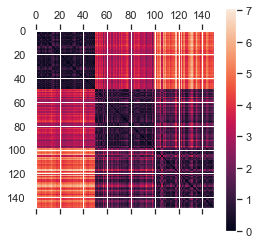

In [15]:
#plot the matrix
plt.matshow(matrix)
plt.colorbar()
plt.show()

## Your answer here:
#### 3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix?
The minimum number of computation is N*N/2 because the matrix is symetric. That means we need only one half of the sqare matrix, one triangle, to know all the distance.
#### 4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [5%]
We can visually distinguish the 3 different classes, by spoting 3 different squares. Each of them representing one of the class.

## Question 3: Data Sampling [40%]

Sometimes datasets are too big, or come in a streaming fashion, and it is impossible for us to process every single data point, so we have to resort to sampling methods. In this question, you will implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. Subsequently, you will experiment with sampling directly all the data and conducting stratified sampling (by class label) and observe the results in the data distribution.

### Question 3a: Reservoir Sampling [20%]
1. Implement reservoir sampling as we saw it in class. Create a 'reservoir_sampling' function because it will be useful for the next question. [15%]
2. Run reservoir sampling with reservoir size $M = 15$ and plot the histogram of the petal length feature for the sampled dataset [5%]

In [22]:
#1-Implement reservoir sampling as we saw it in class. [15%]
import random
def reservoir_sampling(stream,M):
    res = [0]*M
    
    for i in range(M):
        res[i] = stream.loc[i]
    
    while(i < len(stream)):
        j = random.randrange(i+1)
        
        if(j < M):
            res[j] = stream.loc[i] 
            i+=1
    return pd.DataFrame(res)

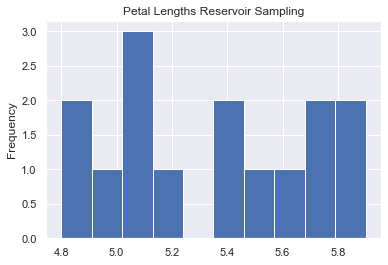

In [23]:
#2- Run reservoir sampling with reservoir size  𝑀=15  and plot the histogram of the petal length feature for the sampled dataset
res_sample = reservoir_sampling(data, M=15)
res_histogram = res_sample['petal_length'].plot(kind="hist", grid=True, title="Petal Lengths Reservoir Sampling")

### Question 3b: Stratified Sampling [20%]
1. Implement stratified sampling by class label, and within each stratum use the reservoir sampling function you implemented. [15%]
2. Run your stratified sampler with $M=5$ samples per class (so that we have 15 data points in total) and plot the histogram of the petal length feature for the sampled dataset [2.5%]
3. Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question you may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. [2.5%]

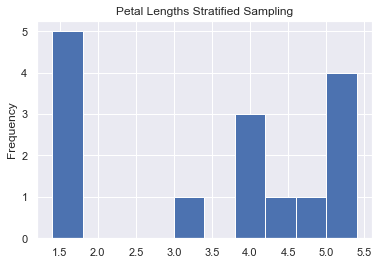

In [24]:
#1- Implement stratified sampling by class label
def stratified_sampling(stream, M):
    #define the 3 classes
    setosas = []
    versicolors = []
    virginicas = []
    
    #Append each data point to its corresponding class
    for i in range(len(stream)):
        item = stream.loc[i]
        class_label = item["label"]
        
        if class_label == "Iris-setosa":
            setosas.append(item)
        elif class_label == "Iris-versicolor":
            versicolors.append(item)
        elif class_label == "Iris-virginica":
            virginicas.append(item)
    
    #Convert in df and reseet index 
    setosas = pd.DataFrame(setosas).reset_index(drop=True)
    versicolors = pd.DataFrame(versicolors).reset_index(drop=True)
    virginicas = pd.DataFrame(virginicas).reset_index(drop=True)
    
    # Reservoir sampling and merging
    res_setosas = reservoir_sampling(setosas, M).reset_index(drop=True)
    res_versicolors = reservoir_sampling(versicolors, M).reset_index(drop=True)
    res_virginicas = reservoir_sampling(virginicas, M).reset_index(drop=True)
    
    res_sample = pd.concat([res_setosas, res_versicolors, res_virginicas]).reset_index(drop=True)
    
    return res_sample

strat_sample = stratified_sampling(data, 5)
strat_histogram = strat_sample["petal_length"].plot(kind="hist", grid=True, title="Petal Lengths Stratified Sampling")

### 3- Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question you may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. [2.5%]

The plots look similar but the stratified one is more stable, it changed less compare to the non-stratified histogram. The stratified histogram is closer to the original histogram of petal_length. It might be more accurate because we are using the 3 classes for the sampling. 
